In [3]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [4]:
classical_electron_radius = 2.81794032e-15  # [m]
elec_rest_energy = 8.1871057880e-14  # [J]
MeV = 1.6022e-13  # [J]
barn = 1e-28  # [m2]
mol = 6.021e23  # [/mol]
material_number_density = 19320000 / 196.97 * mol * 79


def gamma_cross_section_density_total(energy_in: npt.NDArray) -> npt.NDArray:
    s0 = 6.651e-29  # [m2]
    a0 = energy_in / elec_rest_energy
    csd_compton_total = (
        s0 * 3 / 8 / a0 * (np.log(2 * a0) + 0.5) * material_number_density
    )
    return csd_compton_total


# returns [/m /st]
def gamma_cross_section_density_compton(
    energy_in: npt.NDArray, phot_angle_out: npt.NDArray
) -> npt.NDArray:
    alpha_0 = energy_in / elec_rest_energy
    cos_theta = np.cos(phot_angle_out)
    return (
        classical_electron_radius**2
        / 2
        * (1 + cos_theta**2)
        / (1 + alpha_0 * (1 - cos_theta)) ** 2
        * (
            1
            + (alpha_0**2 * (1 - cos_theta) ** 2)
            / ((1 + cos_theta**2) * (1 + alpha_0 * (1 - cos_theta)))
        )
    ) * material_number_density

# def gamma_cross_section_density_pairproduction(
#     energy_in: npt.NDArray, 
# )


def compton_elec_params(
    phot_energy_in: npt.NDArray, phot_angle_out: npt.NDArray
) -> tuple[
    npt.NDArray,  # elec_energy_out
    npt.NDArray,  # elec_angle_out
]:
    a_0 = phot_energy_in / elec_rest_energy
    a = a_0 / (1 + a_0 * (1 - np.cos(phot_angle_out)))
    elec_energy_out = (a_0 - a) * elec_rest_energy
    elec_angle_out = np.arctan(1 / (a_0 + 1)) * np.sqrt((2 * a_0 * a) / (a_0 - a) - 1)
    return elec_energy_out, elec_angle_out

(array([ 104.,  278.,  484.,  612.,  802.,  948., 1005., 1004., 1089.,
        1215., 1190., 1130., 1229., 1215., 1126., 1105., 1125., 1121.,
        1078., 1020., 1008.,  932.,  931.,  894.,  856.,  814.,  810.,
         854.,  770.,  738.,  743.,  648.,  724.,  655.,  637.,  609.,
         560.,  603.,  581.,  571.,  531.,  542.,  507.,  517.,  494.,
         512.,  487.,  496.,  466.,  460.,  462.,  449.,  369.,  384.,
         402.,  394.,  397.,  347.,  384.,  335.,  367.,  341.,  333.,
         370.,  295.,  279.,  277.,  273.,  286.,  249.,  261.,  241.,
         217.,  268.,  222.,  229.,  217.,  216.,  208.,  203.,  184.,
         180.,  166.,  177.,  152.,  122.,  126.,  108.,  118.,   92.,
          79.,   91.,   65.,   52.,   55.,   38.,   33.,   33.,   18.,
           6.]),
 array([7.73095111e-04, 3.20319019e-02, 6.32907087e-02, 9.45495155e-02,
        1.25808322e-01, 1.57067129e-01, 1.88325936e-01, 2.19584743e-01,
        2.50843550e-01, 2.82102356e-01, 3.13361163e-01, 3.

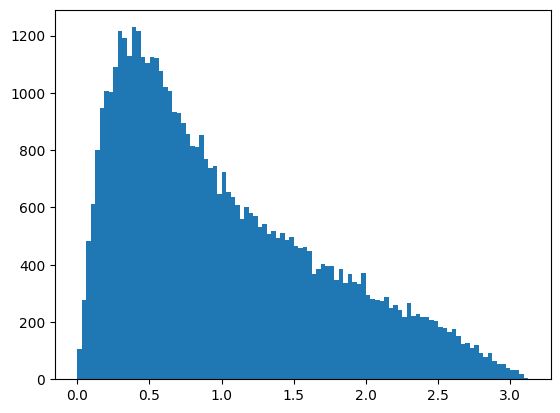

In [5]:
phot_energy_in = np.linspace(0.5,20,1000)*MeV
phot_angle_out = np.linspace(0,np.pi,1001)
csd = gamma_cross_section_density_compton(
    np.expand_dims(phot_energy_in, axis=1).repeat(phot_angle_out.shape[0],axis=1),
    np.expand_dims(phot_angle_out, axis=0).repeat(phot_energy_in.shape[0],axis=0),
)
# plt.plot(csd[160,:] / (barn * mol))
# plt.plot(
#     phot_energy_in,
#     # phot_angle_out,
#     np.exp(-1e-3*cross_section.sum(axis=1))
# )

x = csd.copy()
x *= np.sin(phot_angle_out) * 2 * np.pi * (phot_angle_out[1]-phot_angle_out[0])
# plt.plot(phot_energy_in, gamma_cross_section_density_total(phot_energy_in) / (barn * mol))
# plt.plot(phot_energy_in, np.sum(x,axis=1) / (barn * mol))
x = np.cumsum(x,axis=1)
# plt.plot(phot_angle_out, x[160,:] / (barn * mol))
# plt.plot(phot_energy_in, x[:,-1] / (barn * mol))
# plt.plot(x[:,-1] / (barn * mol))

# plt.plot(phot_angle_out, x[500,:] / (barn * mol))
# plt.plot(phot_angle_out, (csd[500,:]*np.sin(phot_angle_out) * 2 * np.pi) / (barn * mol))

x /= x[:,-1:].repeat(x.shape[1],axis=1)

# plt.plot(x[::100,:].transpose())
plt.hist(
    np.interp(
        np.random.uniform(0,1,(50000,)),
        x[100,:],
        phot_angle_out,
    ),
    bins=100,
)

sample first parameter,
sample second parameter on a distribution interpolated from the first sample

In [39]:
# [i], [j], [i, j, ..] -> [i, ..]
def interp2(x: npt.ArrayLike, xp: npt.ArrayLike, fp: npt.ArrayLike) -> npt.NDArray:
    # https://stackoverflow.com/questions/43772218/fastest-way-to-use-numpy-interp-on-a-2-d-array
    x = np.array(x)
    xp = np.array(xp)
    fp = np.array(fp)
    i = np.arange(x.size)
    j = np.clip(np.searchsorted(xp, x) - 1, a_min=0, a_max=xp.size - 2)
    d = np.clip((x - xp[j]) / (xp[j + 1] - xp[j]), 0, 1)
    if len(fp.shape) > 2:
        axes = np.array(range(len(fp.shape) - 1))
        axes[[0, -1]] = axes[[-1, 0]]
        return np.transpose(
            (1 - d) * np.transpose(fp[i, j], axes=axes)
            + np.transpose(fp[i, j + 1], axes=axes) * d,
            axes=axes,
        )
    else:
        return (1 - d) * fp[i, j] + fp[i, j + 1] * d


# [i], [j], [j, ..] -> [i, ..]
def interpx(x: npt.ArrayLike, xp: npt.ArrayLike, fp: npt.ArrayLike) -> npt.NDArray:
    # https://stackoverflow.com/questions/43772218/fastest-way-to-use-numpy-interp-on-a-2-d-array
    x = np.array(x)
    xp = np.array(xp)
    fp = np.array(fp)
    j = np.clip(np.searchsorted(xp, x) - 1, a_min=0, a_max=xp.size - 2)
    d = np.clip((x - xp[j]) / (xp[j + 1] - xp[j]), 0, 1)
    if len(fp.shape) > 1:
        axes = np.array(range(len(fp.shape)))
        axes[[0, -1]] = axes[[-1, 0]]
        return np.transpose(
            (1 - d) * np.transpose(fp[j], axes=axes)
            + np.transpose(fp[j + 1], axes=axes) * d,
            axes=axes,
        )
    else:
        return (1 - d) * fp[j] + fp[j + 1] * d


# [count, dist_len]
def sample_dists(
    dists: npt.NDArray, out_range: npt.NDArray | None = None
) -> npt.NDArray:
    if out_range is None:
        out_range = np.arange(dists.shape[1])
    return np.array([np.interp(np.random.random(), dist, out_range) for dist in dists])


def normalize_axis(x_in: npt.ArrayLike, axis: int) -> npt.NDArray:
    x = np.array(x_in)
    axes = np.array(range(len(x.shape)))
    axes[[0, axis]] = axes[[axis, 0]]

    x = x.transpose(axes)
    x -= x[0]
    return np.transpose(x / x[-1], axes=axes)

In [6]:
# x = np.array([[1,2,3,4],[4,5,6,7],[7,8,9,10]])
x = np.array(range(10))
x[[0,-1]] = x[[-1,0]]
x

array([9, 1, 2, 3, 4, 5, 6, 7, 8, 0])

In [7]:
normalize_axis([[1,1,2],[2,5,5]],axis=0)

array([[0., 0., 0.],
       [1., 1., 1.]])

(array([[ 13.,   1.,   2.,   1.,   0.,   0.,   0.,   0.,   1.,   2.],
        [ 52.,  14.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.],
        [133.,  65.,  11.,   1.,   0.,   4.,   0.,   0.,   0.,   0.],
        [180., 117.,  64.,  13.,   0.,   0.,   0.,   0.,   0.,   0.],
        [235., 177., 144.,  68.,  15.,   3.,   2.,   1.,   1.,   2.],
        [295., 246., 160., 135.,  54.,  16.,   2.,   1.,   2.,   1.],
        [332., 313., 249., 182.,  93.,  71.,  17.,   0.,   0.,   2.],
        [414., 356., 276., 258., 203., 115.,  73.,  14.,   1.,   2.],
        [504., 433., 340., 288., 222., 180., 117.,  59.,  21.,   0.],
        [524., 468., 399., 369., 297., 229., 163., 112.,  56.,  13.]]),
 array([ 14.68035654, 113.11131739, 211.54227823, 309.97323908,
        408.40419993, 506.83516077, 605.26612162, 703.69708246,
        802.12804331, 900.55900416, 998.989965  ]),
 array([4.23535363e-03, 9.91376149e+01, 1.98270994e+02, 2.97404374e+02,
        3.96537754e+02, 4.95671133e+02, 5.9480

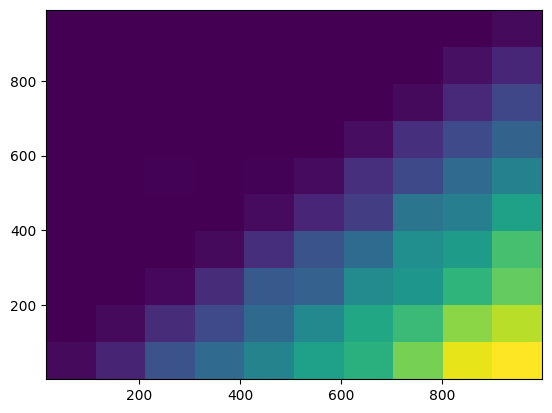

In [ ]:
# dist = np.fromfunction(lambda x,y: 1/(1+((x)**0.5-(y/2)**0.5)**2),(10,20))
# dist = np.fromfunction(lambda x,y: 1-np.clip(np.abs(x/10-y/20),0,1),(10,20))
dist = np.fromfunction(lambda x,y: np.clip(x-y,a_min=1,a_max=None),(1000,1000))
dist /= np.sum(dist)
dist = np.array(dist)

dist_0 = normalize_axis(np.cumsum(dist.sum(axis=(1,))),axis=0)
# dist_0 = np.concat([np.zeros((1,)+dist_0.shape[1:]),dist_0],axis=0)
dist_1 = normalize_axis(dist.cumsum(axis=1),axis=1)
# dist_1 = np.concat([np.zeros(dist_1.shape[:1]+(1,)),dist_1],axis=1)

x0 = np.interp(np.random.random(10000), dist_0, np.arange(dist_0.shape[0]))

# K = np.expand_dims(dist_1,axis=0).repeat(x0.size, axis=0)
# dist_1_interpolated = interp2(
#     x0,
#     np.linspace(0,1,dist_1.shape[0]),
#     K,
# )
dist_1_interpolated = interpx(
    x0,
    np.arange(dist_1.shape[0]),
    dist_1,
)
# plt.plot(dist_1_interpolated[:40].transpose())
x1 = sample_dists(dist_1_interpolated)


# plt.imshow(dist)
# plt.imshow(dist_1)
# plt.plot(dist_1.transpose())


# print(x0,x1)
plt.hist2d(x0,x1)
# plt.hist(x0)
# plt.hist(x1)
# plt.scatter(x0,x1,s=1)

# plt.imshow(dist_1_interpolated[:20])
# dist_1_interpolated[0]
# plt.plot(dist_1[:,1])
# plt.imshow(dist_1)

(array([[104.,  77.,  61.,  42.,  10.,   4.,   1.,   0.,   0.,   0.],
        [126.,  90.,  79.,  50.,  31.,  15.,   1.,   0.,   1.,   2.],
        [125., 132.,  87.,  84.,  55.,  35.,  27.,   0.,   0.,   0.],
        [144., 149., 114.,  99.,  74.,  59.,  38.,  17.,   1.,   1.],
        [162., 165., 124., 124., 109.,  81.,  44.,  36.,  19.,   2.],
        [181., 194., 162., 135., 112.,  96.,  62.,  63.,  29.,  16.],
        [216., 184., 151., 156., 120., 139.,  97.,  68.,  58.,  38.],
        [263., 208., 200., 165., 157., 153., 133., 112.,  65.,  52.],
        [258., 231., 194., 185., 155., 159., 141., 115., 118.,  77.],
        [248., 244., 239., 196., 188., 172., 151., 124., 115., 104.]]),
 array([2.08114957e-01, 5.00836636e+01, 9.99592122e+01, 1.49834761e+02,
        1.99710310e+02, 2.49585858e+02, 2.99461407e+02, 3.49336955e+02,
        3.99212504e+02, 4.49088053e+02, 4.98963601e+02]),
 array([1.83630991e-02, 4.98979604e+01, 9.97775576e+01, 1.49657155e+02,
        1.99536752e+02, 

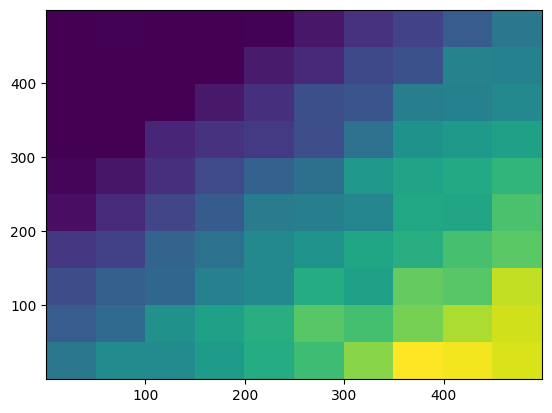

In [22]:
# dist = np.fromfunction(lambda x,y: 1/(1+((x)**0.5-(y/2)**0.5)**2),(10,20))
# dist = np.fromfunction(lambda x,y: 1-np.clip(np.abs(x/10-y/20),0,1),(10,20))
dist = np.fromfunction(lambda x,y,z: np.clip(z*5+x-y,a_min=1,a_max=None),(500,500,100))
dist /= np.sum(dist, axis=(0,1))
dist = np.transpose(dist,axes=[2,0,1])

dist_0 = normalize_axis(np.cumsum(dist.sum(axis=(2,)), axis=1),axis=1)
# dist_0 = np.concat([np.zeros((1,)+dist_0.shape[1:]),dist_0],axis=0)
dist_1 = normalize_axis(dist.cumsum(axis=2),axis=2)
# dist_1 = np.concat([np.zeros(dist_1.shape[:1]+(1,)),dist_1],axis=1)

# x0 = np.interp(np.random.random(10000), dist_0, np.arange(dist_0.shape[0]))
argument = 50

dist_0_interpolated = interpx(
    [argument],
    np.arange(dist_0.shape[0]),
    dist_0,
)[0]
x0 = np.interp(np.random.random(10000), dist_0_interpolated, np.arange(dist_0_interpolated.shape[0]))

# K = np.expand_dims(dist_1,axis=0).repeat(x0.size, axis=0)
# dist_1_interpolated = interp2(
#     x0,
#     np.linspace(0,1,dist_1.shape[0]),
#     K,
# )

dist_1_interpolated = interpx(
    x0,
    np.arange(dist_1.shape[1]),
    interpx(
        [argument],
        np.arange(dist_1.shape[0]),
        dist_1,
    )[0],
)
# plt.plot(dist_1_interpolated[:40].transpose())
x1 = sample_dists(dist_1_interpolated)


# plt.imshow(dist)
# plt.imshow(dist_1)
# plt.plot(dist_1.transpose())


# print(x0,x1)
plt.hist2d(x0,x1)
# plt.hist(x0)
# plt.hist(x1)
# plt.scatter(x0,x1,s=1)

# plt.imshow(dist_1_interpolated[:20])
# dist_1_interpolated[0]
# plt.plot(dist_1[:,1])
# plt.imshow(dist_1)

In [37]:
Distr_1_2 = tuple[npt.NDArray, npt.NDArray, npt.NDArray, npt.NDArray, npt.NDArray]


def prep_distr_1_2(
    dist: npt.NDArray,  # [arg_axis, distr_axis_0, distr_axis_1]
    arg_range: npt.NDArray,  # [arg_axis]
    distr_axis_0_range: npt.NDArray,  # [distr_axis_0]
    distr_axis_1_range: npt.NDArray,  # [distr_axis_1]
) -> Distr_1_2:
    dist_0 = normalize_axis(np.cumsum(dist.sum(axis=(2,)), axis=1), axis=1)
    dist_1 = normalize_axis(dist.cumsum(axis=2), axis=2)
    return dist_0, dist_1, arg_range, distr_axis_0_range, distr_axis_1_range


def sample_distr_1_2(
    count: int,
    dist_1_2: Distr_1_2,
    argument: float,
) -> tuple[npt.NDArray, npt.NDArray]:
    dist_0, dist_1, arg_range, distr_axis_0_range, distr_axis_1_range = dist_1_2

    dist_0_interpolated: npt.NDArray = interpx(
        [argument],
        arg_range,
        dist_0,
    )[0]
    x0 = np.interp(
        np.random.random(count),
        dist_0_interpolated,
        distr_axis_0_range,
    )
    dist_1_interpolated = interpx(
        x0,
        distr_axis_0_range,
        interpx([argument], arg_range, dist_1)[0],
    )
    x1 = sample_dists(dist_1_interpolated, out_range=distr_axis_1_range)
    return x0, x1

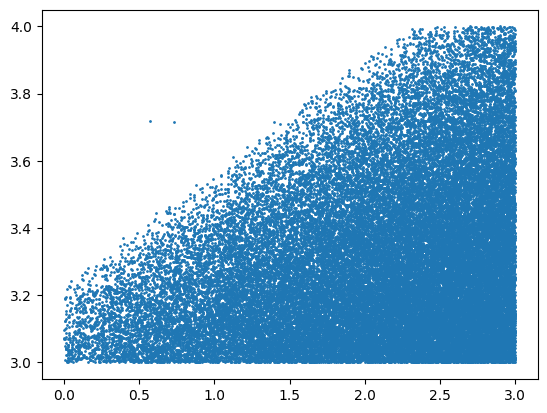

In [106]:
dist = np.fromfunction(
    lambda z, x, y: np.clip(z * (z * 5 + x - y), a_min=1, a_max=None), (100, 500, 500)
)
dist = prep_distr_1_2(
    dist, np.linspace(0, 2, 100), np.linspace(0, 3, 500), np.linspace(3, 4, 500)
)
plt.scatter(*sample_distr_1_2(50000, dist, 0.5), s=1)

In [77]:
Distr_1_1 = tuple[npt.NDArray, npt.NDArray, npt.NDArray]


def prep_distr_1_1(
    dist: npt.NDArray,  # [arg_axis, distr_axis_0]
    arg_range: npt.NDArray,  # [arg_axis]
    distr_axis_0_range: npt.NDArray,  # [distr_axis_0]
) -> Distr_1_1:
    return (
        normalize_axis(np.cumsum(dist, axis=1), axis=1),
        arg_range,
        distr_axis_0_range,
    )


def sample_distr_1_1(
    count: int,
    dist: Distr_1_1,
    argument: float,
) -> tuple[npt.NDArray, npt.NDArray]:
    dist_0,arg_range,distr_axis_0_range = dist
    dist_interpolated: npt.NDArray = interpx(
        [argument],
        arg_range,
        dist_0,
    )[0]
    x0 = np.interp(
        np.random.random(count),
        dist_interpolated,
        distr_axis_0_range,
    )
    return x0

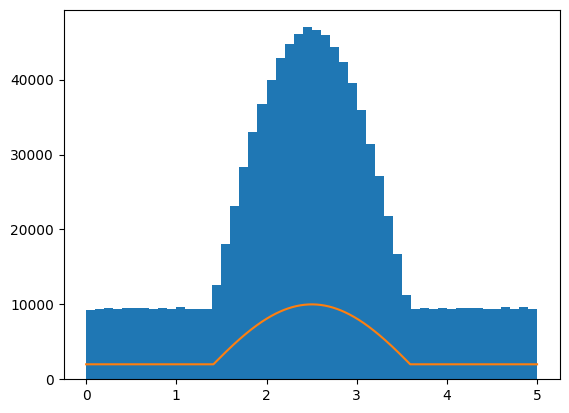

In [105]:
dist = np.fromfunction(
    lambda z, x: np.clip(np.sin((x-10*z)/1000*np.pi*2), a_min=0.2, a_max=None), (100, 1000)
)
# plt.plot(dist[0])
# plt.plot(dist[10])
# plt.plot(dist[20])
dist_ = prep_distr_1_1(
    dist, np.linspace(0, 2, 100), np.linspace(0, 5, 1000)
)

plt.hist(sample_distr_1_1(1000000, dist_, 0.5),bins=50)
plt.plot(np.linspace(0, 5, 1000),1e4*dist[25])

In [6]:
a = np.array([[1,2,3,4],[3,4,5,6]])

(a.transpose([1,0]) / a.transpose([1,0]).max(axis=0)).transpose([1,0])

array([[0.25      , 0.5       , 0.75      , 1.        ],
       [0.5       , 0.66666667, 0.83333333, 1.        ]])

(0.0, 1.1)

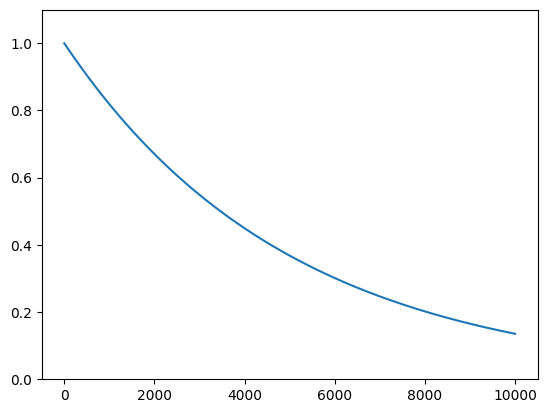

In [ ]:
plt.plot(np.exp(-2*np.linspace(0,1,10000)))
plt.ylim(0,1.1)
plt.hist()
# plt.hist(
#     np.exp(-2*np.random.uniform(0,1,(10000,))),
#     bins=100,
# )

In [16]:
x = np.array([1,2,3])
y = x.copy()
y *= 2
x,y

(array([1, 2, 3]), array([2, 4, 6]))